# Intro

In [131]:
import spacy

#%load_ext nb_black

nlp = spacy.load("en_core_web_sm")

In [132]:
# Process sentences 'Hello, world. Antonio is learning Python.' using spaCy
doc = nlp(u"Hello, world. Antonio is learning Python.")

## Get tokens and sentences

#### What is a Token?
A token is a single chopped up element of the sentence, which could be a word or a group of words to analyse. The task of chopping the sentence up is called "tokenisation".

Example: The following sentence can be tokenised by splitting up the sentence into individual words.

	"Antonio is learning Python!"
	["Antonio","is","learning","Python!"]

In [133]:
# Get first token of the processed document
token = doc[0]
print(token)

# Print sentences (one sentence per line)
for sent in doc.sents:
    print(sent)

Hello
Hello, world.
Antonio is learning Python.


## Part of speech tags

#### What is a Speech Tag?
A speech tag is a context sensitive description of what a word means in the context of the whole sentence.
More information about the kinds of speech tags which are used in NLP can be [found here](http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/).

Examples:

1. CARDINAL, Cardinal Number - 1,2,3
2. PROPN, Proper Noun, Singular - "Jan", "Javier", "Antonio", "Italy"
3. INTJ, Interjection - "Ohhhhhhhhhhh"

In [134]:
# For each token, print corresponding part of speech tag
for token in doc:
    print(f'{token} - {token.pos_}')

Hello - INTJ
, - PUNCT
world - NOUN
. - PUNCT
Antonio - PROPN
is - AUX
learning - VERB
Python - PROPN
. - PUNCT


In [135]:
from spacy import displacy

In [136]:
displacy.serve(doc, style='dep')



C:\Users\User\anaconda3\envs\nlp\lib\site-packages\spacy\displacy\__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [137]:
displacy.render(doc, style = "ent",jupyter = True)


We have said that dependency structures are represented by directed graphs that satisfy the following constraints:

1. There is a single designated root node that has no incoming arcs.

2. With the exception of the root node, each vertex has exactly one incoming arc.

3. There is a unique path from the root node to each vertex in V.

You can inspect the head of each token by invoking the `.head` attribute of a spaCy token:


In [138]:
doc[2]

world

In [139]:
doc[2].head

Hello

So how would you search for the root?

Since there is a unique path from the root node to each vertex in V, there's only one root node that has no incoming arcs, we can search for the token which have as head itself!

In [140]:
for token in doc:
    if token.head == token:
        print(token)

Hello
learning


As expected, since there were two sentences in the doc, we got two roots.

We can also build a function that, given a spaCy token, gives the path till the root:

In [141]:
doc[4].head

learning

In [142]:
# Define a function to find the path to the root of each word in a sentence

def path_to_the_root(token):
    if token.head == token:
        return
    else:
        print(f"{token}->{token.head}")
        path_to_the_root(token.head)


In [143]:
path_to_the_root(doc[4])

Antonio->learning


# Pride and Prejudice analysis

We would like to:

- Extract the names of all the characters from the book (e.g. Elizabeth, Darcy, Bingley)
- Visualize characters' occurences with regards to relative position in the book
- Authomatically describe any character from the book
- Find out which characters have been mentioned in a context of marriage
- Build keywords extraction that could be used to display a word cloud (example)

To load the text file, it is convinient to decode using the utf-8 standard:

In [144]:
def read_file(file_name):
    with open(file_name, "r", encoding="utf-8") as file:
        return file.read()

### Process full text

In [146]:
text = read_file("data/pride_and_prejudice.txt")
# Process the text
processed_text = nlp(text)

In [147]:
for sent in processed_text.sents:
    print(sent)

The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen


This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  
You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License
included
with this eBook or online at www.gutenberg.org



Title: Pride and Prejudice


Author:
Jane Austen


Posting Date:
August 26, 2008
[EBook #1342]

Release Date:
June, 1998

Last updated: February 15, 2015]


Language: English



*** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE
***





Produced by Anonymous Volunteers





PRIDE AND PREJUDICE


By Jane Austen



Chapter 1



It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.


However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the rightful property
o

"Some time or other he _will_ be--but it shall not be by _me_.
Till I
can forget his father, I can never defy or expose _him_."


Elizabeth honoured him for such feelings, and thought him handsomer than
ever as he expressed them.


"But what," said she, after a pause, "can have been his motive?
What can
have induced him to behave so cruelly?"


"A thorough, determined dislike of me--a dislike which I can
not but
attribute in some measure to jealousy.
Had the late Mr. Darcy liked me
less
, his son might have borne with me better; but his father's uncommon
attachment to me irritated him, I believe, very early in life.
He had
not a temper to bear the sort of competition in which we stood--the sort
of preference which was often given me."


"I had not thought Mr. Darcy so bad as this--though I have never liked
him.
I had not thought so very ill of him.
I had supposed him to be
despising his fellow-creatures in general, but did not suspect him of
descending to such malicious revenge, such i

Elizabeth had heard soon after her arrival that Mr. Darcy was
expected there in the course of a few weeks, and though there were not
many of her acquaintances whom she did not prefer, his coming would
furnish one comparatively new to look at in their Rosings parties, and
she might be amused in seeing how hopeless Miss Bingley's designs on him
were, by his behaviour to his cousin, for whom he was evidently
destined by Lady Catherine, who talked of his coming with the greatest
satisfaction, spoke of him in terms of the highest admiration, and
seemed almost angry to find that he had already been frequently seen by
Miss Lucas and herself.


His arrival was soon known at the Parsonage; for Mr. Collins was walking
the whole morning within view of the lodges opening into Hunsford Lane,
in order to have the earliest assurance of it, and after making his
bow as the carriage turned into the Park, hurried home with the great
intelligence.
On the following morning he hastened to Rosings to pay his

with such forbearance and liberality towards him.
And there are other
circumstances which I am not at liberty--which it is not worth while to
relate; but his lies about the whole Pemberley family are endless.
From
what he said of Miss Darcy
I was thoroughly prepared to see a proud,
reserved, disagreeable girl.
Yet he knew to the contrary himself.
He
must know that she was as amiable and unpretending as we have found
her."


"But does Lydia know nothing of this?
can she be ignorant of what you
and Jane seem so well to understand?"


"
Oh, yes!--that, that is the worst of all.
Till I was in Kent, and saw
so much both of Mr. Darcy and his relation Colonel Fitzwilliam, I was
ignorant of the truth myself.
And when I returned home, the ----shire
was to leave Meryton in a week or fortnight's time.
As that was the
case, neither Jane, to whom I related the whole, nor I, thought it
necessary to make our knowledge public; for of what use
could

it apparently be to any one, that the good opinion w


"The letter shall certainly be burnt, if you believe it essential to the
preservation of my regard; but, though we have both reason to think my
opinions not entirely unalterable, they are not, I hope, quite so easily
changed as that implies."


"When I wrote that letter," replied Darcy, "I believed myself perfectly
calm and cool, but I am since convinced that it was written in a
dreadful bitterness of spirit."


"The letter, perhaps, began in bitterness, but it did not end so.
The
adieu is charity itself.
But think no more of the letter.
The feelings
of the person who wrote, and the person who received it, are now
so widely different from what they were then, that every unpleasant
circumstance attending it ought to be forgotten.
You must learn some
of my philosophy.
Think only of the past as its remembrance gives you
pleasure."


"I cannot give you credit for any philosophy of the kind.
Your
retrospections must be so totally void of reproach, that the contentment
arising from them is 

In [152]:
# How many sentences are in the book (Pride & Prejudice)?
x = []
for sen in processed_text.sents:
    x.append(sen)
print(len(x))
    



7153


In [153]:
x[10:16]

[Release Date:,
 June, 1998,
 Last updated: February 15, 2015]
 ,
 Language: English
 
 ,
 *** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE,
 ***
 
 
 
 ]

## Find all the personal names

[Hint](# "List doc.ents and check ent.label_")

In [155]:
# Extract all the personal names from Pride & Prejudice and count their occurrences.
# Expected output is a list in the following form: [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266) ...].

from collections import Counter, defaultdict


def find_character_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.

    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266)]
    """

    characters = Counter()
    # your code here
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            characters[ent.lemma_] += 1
    return characters.most_common()
            
        
        


print(find_character_occurences(processed_text)[:20])

[('Elizabeth', 600), ('Darcy', 355), ('Jane', 277), ('Bingley', 260), ('Bennet', 258), ('Collins', 166), ('Wickham', 108), ('Lizzy', 94), ('Gardiner', 90), ('Lady Catherine', 76), ('Kitty', 62), ('Meryton', 44), ('Pemberley', 37), ('Mary', 34), ('William', 33), ('Hurst', 30), ('Charlotte', 30), ('Forster', 30), ('Fitzwilliam', 29), ('Phillips', 28)]


## Plot characters personal names as a time series 

In [156]:
# Matplotlib Jupyter HACK
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

We can investigate where a particular entity occurs in the text. We can do it just accessing the `.start` attribute of an entity:

[Hint](# "ent.start")

In [157]:
# List all the start positions of person entities
for ent in processed_text.ents:
    if ent.label_ == 'PERSON':
        print(ent.start)

7
10
74
128
136
228
255
275
293
355
406
515
647
746
793
795
859
908
922
944
997
1012
1181
1285
1296
1371
1376
1393
1422
1438
1452
1496
1519
1550
1575
1609
1622
1635
1649
1701
1787
1835
1901
1927
1942
1969
2102
2172
2186
2310
2370
2393
2425
2475
2485
2554
2580
2610
2613
2709
2733
2762
2819
2855
2934
2954
2997
3009
3028
3080
3168
3233
3240
3244
3318
3371
3532
3602
3674
3752
3758
3763
3834
3851
3871
3873
3878
3885
3897
3958
4039
4071
4092
4147
4189
4226
4235
4243
4252
4257
4377
4417
4433
4534
4536
4553
4623
4785
5006
5040
5250
5285
5385
5401
5431
5521
5525
5567
5571
5590
5595
5604
5646
5657
5673
5680
5731
5790
5806
5849
5899
6071
6079
6127
6136
6181
6186
6195
6203
6229
6279
6294
6306
6314
6361
6432
6441
6475
6511
6552
6560
6579
6607
6613
6669
6701
6732
6737
6748
6756
6809
6892
6922
7064
7070
7201
7213
7216
7258
7271
7299
7351
7404
7444
7456
7613
7693
7745
7747
7789
7845
7891
7941
8085
8090
8262
8269
8294
8525
8542
8560
8571
8649
8665
8686
8711
8760
8772
8854
8884
8973
9050
9074
9114
9136


83183
83203
83234
83301
83350
83354
83434
83450
83520
83549
83575
83584
83644
83676
83729
83748
83851
83927
83934
84044
84051
84054
84057
84085
84092
84177
84200
84229
84307
84463
84517
84523
84532
84557
84626
84632
84645
84655
84662
84676
84742
84885
84915
84935
84968
84971
85008
85017
85107
85151
85179
85200
85284
85300
85404
85456
85463
85513
85534
85577
85745
85754
85802
85814
85897
85925
86000
86036
86040
86060
86087
86133
86153
86235
86291
86314
86583
86603
86687
86712
86743
86797
86822
86903
86924
86941
86955
86962
87009
87052
87139
87265
87308
87324
87397
87410
87428
87450
87456
87479
87513
87544
87551
87636
87652
87654
87686
87690
87704
87709
87721
87739
87744
87760
87765
87779
87796
87856
87883
87912
87925
88032
88114
88135
88146
88294
88345
88350
88402
88408
88425
88447
88527
88656
88666
88703
88756
88861
88881
88896
88899
89097
89198
89255
89309
89429
89491
89510
89641
89678
89717
89805
89859
89873
89978
89983
90001
90025
90039
90183
90208
90228
90272
90580
90646
90700
9074

So we can create a function that stores all the offsets of every character:
   
   
[Hint](# "Create a dictionary with the lowered lemmas [ent.lemma_.lower()] and associate a list of all the ent.starts")

In [160]:
# Plot characters' mentions as a time series relative to the position of the actor's occurrence in a book.

def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list. 
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.
    
    :param doc: Spacy NLP parsed document
    :return: dict object in form
        {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    """
    character_offsets = {}
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            if ent.lemma_ not in  character_offsets:
                character_offsets[ent.lemma_] = [ent.start]
            else:
                character_offsets[ent.lemma_].append(ent.start)
            
    return character_offsets

character_occurences = get_character_offsets(processed_text)

In [161]:
character_occurences

{'Prejudice': [7, 155589],
 'Jane Austen': [10, 74, 136, 155592],
 'Anonymous Volunteers': [128, 155648],
 'Bennet': [228,
  255,
  293,
  515,
  1012,
  1181,
  1285,
  1496,
  1519,
  1835,
  2102,
  2186,
  2370,
  2393,
  2580,
  2613,
  2709,
  2762,
  3318,
  3602,
  3958,
  4039,
  4377,
  5790,
  5849,
  6186,
  6361,
  10192,
  10730,
  10864,
  11038,
  11054,
  11071,
  11275,
  11426,
  11586,
  11749,
  15290,
  15474,
  15503,
  15624,
  15629,
  15739,
  15755,
  16236,
  16295,
  17214,
  17579,
  18951,
  19270,
  19777,
  21189,
  22709,
  23298,
  23511,
  23630,
  23973,
  24028,
  24641,
  25089,
  25166,
  25507,
  25568,
  25646,
  25721,
  26013,
  26127,
  26467,
  26567,
  26643,
  26943,
  26956,
  26980,
  27047,
  27388,
  27451,
  27602,
  27627,
  27705,
  27780,
  28303,
  29187,
  30215,
  34155,
  34209,
  34232,
  39526,
  40030,
  40745,
  41186,
  41261,
  41331,
  41424,
  41526,
  41742,
  42046,
  44079,
  44218,
  44436,
  44474,
  44522,
  4458

[Hint](# "Use the character offsets for each character as x")

In [44]:
# Plot the histogram of the character occurrences in the whole text
NUM_BINS = 20

def plot_character_hist(character_offsets, character_label, cumulative=False):
    
    pass

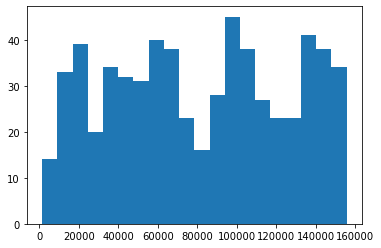

In [45]:
plot_character_hist(character_occurences, "elizabeth")

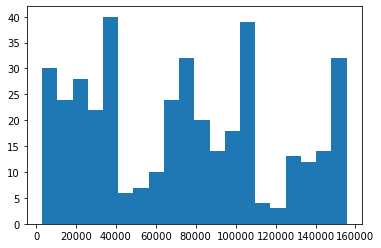

In [46]:
plot_character_hist(character_occurences, "darcy")

### Cumulative occurrences

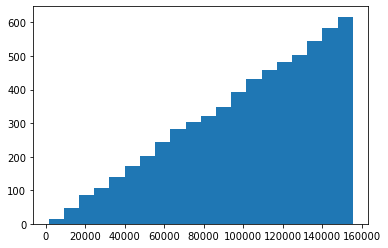

In [47]:
plot_character_hist(character_occurences, "elizabeth", cumulative=True)

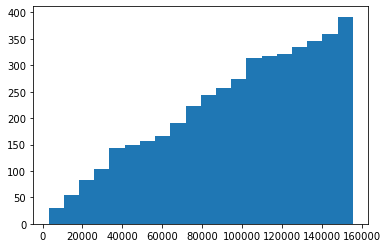

In [48]:
plot_character_hist(character_occurences, "darcy", cumulative=True)

### Spacy parse tree in action

[Hint](# "ent.subtree, token.pos_ == 'ADJ'") 

In [126]:
# Find words (adjectives) that describe Mr. Darcy.

def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`
    
    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """
    
    adjectives = []
    for ent in doc.ents:
        # your code here
        if ent.lemma_.lower() == character_lemma:
            for token in ent.subtree:
                if token.pos_ == "ADJ":
                    adjectives.append(token.lemma_)
                
    
    for ent in doc.ents:
        if ent.lemma_.lower() == character_lemma:
            if ent.root.dep_ == 'nsubj':
                for child in ent.root.head.children:
                    if child.dep_ == 'acomp':
                        adjectives.append(child.lemma_)
                        
    return adjectives

print(get_character_adjectives(processed_text, 'darcy'))

['surprised', 'unwilling', 'grave', 'delighted', 'late', 'late', 'late', 'late', 'intimate', 'confidential', 'present', 'superior', 'late', 'late', 'few', 'poor', 'last', 'little', 'disagreeable', 'clever', 'worth', 'sorry', 'unworthy', 'answerable', 'impatient', 'ashamed', 'kind', 'proud', 'tall', 'punctual', 'engage', 'fond']


In [164]:
# Find words (adjectives) that describe Elizabeth.
def get_character_adjectives_elizabeth(doc,character_lemma):
    adjectives = []
    for ent in doc.ents:
        if ent.lemma_.lower() == character_lemma:
            for token in ent.subtree:
                if token.pos == 'ADJ':
                    adjectives.append(token.lemma_)
                    
    for ent in doc.ents:
        if ent.lemma_.lower() == character_lemma:
            if ent.root.dep_ == 'nsubj':
                for child in ent.root.head.children:
                    if child.dep_ == 'acomp':
                        adjectives.append(child.lemma_)
    return adjectives
        

print(get_character_adjectives(processed_text, 'elizabeth'))

['easy', 'unaffected', 'least', 'dear', 'young', 'dear', 'other', 'wonderful', 'ashamed', 'ungracious', 'reluctant', 'good', 'first', 'dear', 'dear', 'acute', 'dear', 'affected', 'determined', 'convince', 'glad', 'surprised', 'surprised', 'pleased', 'watchful', 'satisfied', 'ready', 'thankful', 'so', 'surprised', 'surprised', 'eager', 'shocked', 'delighted', 'rejoice', 'sensible', 'prepared', 'comfortable', 'relieve', 'pleased', 'pleased', 'pleased', 'surprised', 'surprised', 'disgust', 'glad', 'pleased', 'determined', 'more', 'embarrassed', 'able', 'earnest', 'acquaint']


In [163]:
ent.root.head.pos_ == 'VERB':


SyntaxError: invalid syntax (<ipython-input-163-ccafea90e0ba>, line 1)

For all the dependencies manual: https://nlp.stanford.edu/software/dependencies_manual.pdf

`acomp`: adjectival complement
*i.e.* an adjectival phrase which functions as the complement (like an object of the verb) e.g. "She looks very beautiful": *beautiful* is an adjectival complement of *looks*

`nsubj`: nominal subject
*i.e.* a noun phrase which is the syntactic subject of a clause. The head of this relation
might not always be a verb: when the verb is a copular verb, the root of the clause is the complement of
the copular verb, which can be an adjective or noun.
*e.g.* "Clinton defeated Dole". The relationship is *nsubj(defeated, Clinton)*

"The baby is cute". The relationship is *nsubj(cute, baby)*.

In the code, `.dep_`stands for syntactic dependency, *i.e.* the relation between tokens.

In [165]:
processed_text.ents[30].root.dep_

'conj'

[Hint](# "ent.label_, ent.root.head.lemma_") 

In [211]:
for ent in processed_text.ents:
    print(ent.root.head.lemma_)

Pride
by
of
with
Austen
August
June
update
language
PRIDE
chapter
by
enter
of
say
say
let
reply
be
make
say
take
of
on
chaise
with
before
by
Bingley
man
four
reply
of
with
like
daughter
see
for
be
William
be
for
be
handsome
as
so
as
have
abuse
year
of
come
be
be
of
Bennet
be
on
till
daughter
like
like
like
say
promise
do
niece
say
deign
scold
,
have
reply
be
cry
come
introduce
impossible
stand
say
say
wish
adjust
of
know
tumult
be
cough
say
make
Lydia
dance
say
of
visit
all
ask
daughter
of
hand
intelligence
be
heart
at
say
in
return
visit
sit
plan
oblige
be
be
in
place
at
quiet
to
be
lady
gentleman
comfort
of
bring
from
sister
of
five
sister
be
brother
friend
feature
within
have
than
for
in
make
give
at
dance
with
with
be
slight
dance
be
for
say
cry
have
say
at
at
follow
walk
remain
pass
party
dance
be
feel
pleasure
hear
to
be
Catherine
up
of
have
have
be
think
time
ask
ask
with
for
third
with
dance
with
fourth
with
two
with
two
much
dance
gown--
protest
of
lose
chapter
be
Jane
of
repl

be
fortune
say
society
hear
on
dislike
be
of
condemn
chapter
call
from
arrival
into
fix
have
be
lady
be
young
than
Bennet
eld
part
business
have
be
blame
for
Lizzy
wife
have
estate
Gardiner
of
correspondence
with
for
describe
for
say
with
acquaintance
pray
love
lady
two
poor
_
be
add
suffer
on
of
hear
as
ablution
stir
correspond
affect
be
see
attraction
accept
by
spend
Phillipses
provide
be
render
commendation
to
leave
to
have
mean
spend
of
be
father
see
see
know
of
give
treatment
hear
caution
caution
to
opportunity
be
of
be
with
abominable
to
see
object
say
invite
thank
return
into
by
Gardiners
with
to
be
be
pay
rise
say
hearing
in
leave
to
refuse
father
in
add
be
for
hear
address
letter
letter
like
feel
express
behaviour
picture
of
perceive
in
hope
of
letter
be
be
from
from
in
see
think
to
with
expect
go
Caroline
shake
to
pass
see
inattention
wait
deceive
dearest
regard
return
till
to
say
to
at
with
William
give
dupe
to
account
remind
remind
have
be
of
sighted
in
to
towards
take
Kitt

rise
appear
in
with
say
to
than
say
say
disposition
be
be
of
suspense
-PRON-
do
for
be
do
pay
recollect
letter
for
Mary
mind
at
hearing
sit
Darcy
Lizzy
be
Lizzy
Lizzy
daughter
thousand
go
be
ten
good
be
have
find
pass
stand
assure
rise
son
be
as
chapter
spirit
place
on
to
at
to
endeavour
be
to
to
be
with
answer
letter
lose
round
go
than
send
to
letter
to
send
to
be
of
Catherine
congratulation
to
deceive
express
side
from
to
family
to
render
rejoice
to
expose
to
at
be
vulgarity
stand
humour
do
Happy
daughter
visit
of
miss
daughter
to
remain
Bingley
at
relation
to
buy
Jane
within
sister
as
example
society
invite
be
by
oblige
for
Wickham
become
prevail
receive
from
LIZZY
love
be
like
of
to
have
person
change
be
receive
at
sake
be
in
London
with
humour
mortify
marriage
at
of
to
to
home
hope
have
of
at
instruction
young
be
of
persuasion
at
with
Darcy
into
Pride
by
of
name
by
own
copyright
copy
in
be
for
of
with
PROJECT
Section
1.a.
1.c.
Project
in
in
in
1.d.
outside
work
make
outside
phrase

In [213]:
# Find characters that are 'talking', 'saying', 'doing' the most. Find the relationship between 
# entities and corresponding root verbs.

character_verb_counter = Counter()


for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == 'talk':
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 



# do the same for talking and doing

for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == 'say':
        character_verb_counter[ent.text] += 1
print(character_verb_counter.most_common(10)) 

for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == 'do':
        character_verb_counter[ent.text] += 1
print(character_verb_counter.most_common(10)) 


[('Lady Catherine', 2), ('Jane', 1), ('Gardiner', 1)]
[('Elizabeth', 44), ('Bennet', 29), ('Jane', 15), ('Darcy', 11), ('Bingley', 11), ('Lady Catherine', 7), ('Gardiner', 6), ('Lizzy', 5), ('Miss Bingley', 5), ('Charlotte', 4)]
[('Elizabeth', 46), ('Bennet', 29), ('Darcy', 16), ('Jane', 15), ('Bingley', 15), ('Gardiner', 9), ('Lady Catherine', 8), ('Lizzy', 6), ('Miss Bingley', 5), ('Charlotte', 4)]


[Hint](# "ent.label_, ent.root.head.pos_") 

In [216]:
# Find 20 most used verbs
verb_counter = Counter()

for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.pos_ == 'VERB':
        verb_counter[ent.root.head.lemma_] += 1

print(verb_counter.most_common(20))

[('say', 167), ('see', 57), ('cry', 51), ('reply', 48), ('come', 30), ('look', 30), ('make', 24), ('think', 24), ('leave', 24), ('tell', 21), ('go', 21), ('give', 19), ('take', 18), ('begin', 17), ('hear', 16), ('know', 16), ('feel', 15), ('find', 15), ('call', 14), ('seem', 14)]


In [218]:
# Create a dataframe with the most used verb and how many time a character used the verb

import pandas as pd
verb_characters = {}
verb_list = [verb[0] for verb in verb_counter.most_common(20)]
for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ in verb_list:
        verb = ent.root.head.lemma_
        person = ent.text
        if verb not in verb_characters:
            verb_characters[verb] = {person:1}
        else:
            if ent.text not in verb_characters[verb]:
                verb_characters[verb][person] = 1
            else:
                verb_characters[verb][person] += 1


In [219]:
df = pd.DataFrame(verb_characters).transpose().fillna(0)
df

,Bennet,Long,Elizabeth,Mary,Jane,Lucas,Lizzy,Charlotte,Catherine,Darcy,...,Sarah,Eliza,John,Hunsford,Hertfordshire,Kent,Meryton,Charles,Lady Metcalf's,Younge
say,29.0,2.0,44.0,3.0,14.0,3.0,5.0,4.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reply,4.0,0.0,18.0,0.0,7.0,0.0,0.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
make,3.0,0.0,7.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
see,2.0,0.0,17.0,0.0,8.0,0.0,1.0,1.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cry,3.0,0.0,24.0,0.0,6.0,1.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
come,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feel,0.0,0.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hear,1.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
think,1.0,0.0,8.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tell,3.0,1.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
# drop the less meaningful columns
df = df[df.columns[df.sum()>=10]].sort_index()
df

,Bennet,Elizabeth,Jane,Lizzy,Charlotte,Darcy,Bingley,Lady Catherine,Wickham,Collins,Gardiner,Fitzwilliam
begin,1.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,0.0
call,0.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0
come,1.0,0.0,2.0,1.0,1.0,3.0,5.0,0.0,0.0,1.0,1.0,1.0
cry,3.0,24.0,6.0,1.0,0.0,3.0,4.0,0.0,1.0,2.0,2.0,0.0
feel,0.0,12.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
find,3.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
give,3.0,2.0,1.0,3.0,0.0,3.0,1.0,0.0,1.0,1.0,2.0,0.0
go,2.0,7.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0
hear,1.0,6.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
know,1.0,3.0,1.0,2.0,0.0,2.0,4.0,0.0,1.0,1.0,0.0,0.0


,Bennet,Elizabeth,Jane,Lizzy,Charlotte,Darcy,Bingley,Lady Catherine,Wickham,Collins,Gardiner,Fitzwilliam
begin,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
call,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
come,1.000000,0.000000,2.000000,1.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000
cry,3.000000,24.000000,6.000000,1.000000,0.000000,3.000000,4.000000,0.000000,1.000000,2.000000,2.000000,0.000000
feel,0.000000,12.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
find,3.000000,7.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
give,3.000000,2.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
go,2.000000,7.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000
hear,1.000000,6.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
know,1.000000,3.000000,1.000000,2.000000,0.000000,2.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000


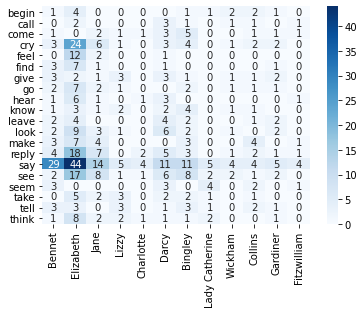

In [222]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df, annot=True, cmap='Blues')
df.style.background_gradient(cmap='Blues')
